# Linear Regression on Diabetes Dataset

### Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

from sklearn.linear_model import LinearRegression
from sklearn import linear_model,metrics, datasets
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

Step 1: We apply a evaluation procces, in order to find the most efficient feuture according to the Mean Absolute Error (MAE)

In [2]:
def feuture_selection(diabetes,feutures):
    mae_list=[]
    r2_list=[]
    model = LinearRegression()
    for i in range(0,len(feutures)):
        X = diabetes.data[:,i:i+1]
        y = diabetes.target
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
        model.fit(x_train, y_train)
        y_predicted = model.predict(x_test)
        mae = metrics.mean_squared_error(y_test, y_predicted)
        mae_list.append(mae)
        print("Mean Squared Error of feuture:",feutures[i],'is :',mae)
        
    min_mae = min(mae_list)
    most_efficient = mae_list.index(min_mae)
    print ("The most efficient feature is :",feutures[most_efficient])
    return most_efficient

Step 2: We train the model using the most efficient feuture. 

Step 3: We calcute the neccesary metrcis (Corrleation, MAE, R^2) while evaluate with the testset 

In [3]:
def train_evaluate_model(diabetes,most_efficient):
    X = diabetes.data[:,most_efficient:most_efficient+1]
    y = diabetes.target
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_predicted = model.predict(x_test)
    print("Mean Squared Error: %2f" % metrics.mean_squared_error(y_test, y_predicted))
    print("R^2: %2f" % metrics.r2_score(y_test, y_predicted))
    corr, p_value = pearsonr(y_test, y_predicted)
    print("Correlation: %2f" % corr)
    return model,x_train,y_train

Step 4:  We plot s5 vs regression

In [4]:
def plot_s5_regression(x_train,y_trainm,df):
    plt.figure(figsize=(10, 7))
    sns.regplot(data=df, x=x_train, y=y_train,line_kws={"color": "red"})
    plt.title('S5 vs Regression')
    plt.xlabel('S5')
    plt.ylabel('Regression')
    plt.savefig("Linear_Plot1.pdf")
    plt.show()

Step 5: We plot actual vs predicted values

In [5]:
def plot_actuals_predictions(model,X,y):
    predicted_value=model.predict(X)
    true_value=y
    plt.figure(figsize=(7,7))
    plt.scatter(true_value, predicted_value, c='crimson')
    p1 = max(max(predicted_value), max(true_value))
    p2 = min(min(predicted_value), min(true_value))
    plt.title('Actual vs Predicted Values Trainset')
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=12)
    plt.ylabel('Predictions', fontsize=12)
    plt.axis('equal')
    plt.savefig("Linear_Plot2.pdf")
    plt.show()

### Dataset Loading

In [6]:
diabetes = datasets.load_diabetes()
feutures = diabetes['feature_names']

### Process

Feuture Selection:

Mean Squared Error of feuture: age is : 5481.929655743374
Mean Squared Error of feuture: sex is : 5586.635956971764
Mean Squared Error of feuture: bmi is : 3775.617201500778
Mean Squared Error of feuture: bp is : 4508.279615610543
Mean Squared Error of feuture: s1 is : 5163.261957982821
Mean Squared Error of feuture: s2 is : 5299.482627707971
Mean Squared Error of feuture: s3 is : 4768.054347527789
Mean Squared Error of feuture: s4 is : 4464.804767009776
Mean Squared Error of feuture: s5 is : 3198.5145276013686
Mean Squared Error of feuture: s6 is : 4612.125184027536
The most efficient feature is : s5

Test Evaluation:

Mean Squared Error: 3198.514528
R^2: 0.421574
Correlation: 0.662819

Plot 1:



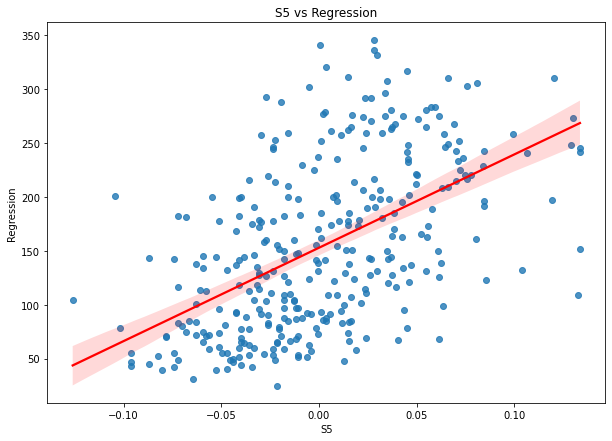


Plot 2:



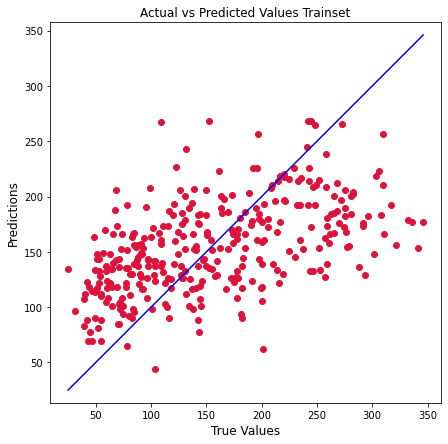

In [7]:
print('Feuture Selection:\n')
most_efficient = feuture_selection(diabetes,feutures)
print('\nTest Evaluation:\n')
model,x_train,y_train = train_evaluate_model(diabetes,most_efficient)
print('\nPlot 1:\n')
plot_s5_regression(x_train,y_train,diabetes)
print('\nPlot 2:\n')
plot_actuals_predictions(model,x_train,y_train)